<a href="https://colab.research.google.com/github/theekshanamadumal/MachineLearning/blob/main/ML_Tensorflow_MNIST_digit_recognition_using_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.version

'3.8.10 (default, Nov 14 2022, 12:59:47) \n[GCC 9.4.0]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##import data

In [22]:
!pip install mnist
import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [17]:
#mnist.data.shape

(70000, 784)

In [4]:
train_images = mnist.train_images() 
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


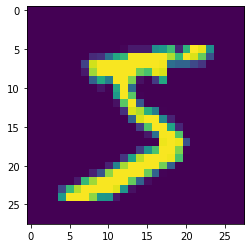

In [6]:
plt.imshow(train_images[0])

In [23]:
train_labels[0]

5

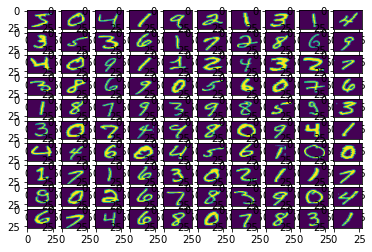

In [18]:
fig,ax=plt.subplots(10,10)
k=0
for i in range (10):
  for j in range (10):
    ax[i][j].imshow(train_images[k],aspect='auto')
    k+=1
plt.show()

##one hot encoding Y values

In [25]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [31]:
# one hot encode
train_labels = to_categorical(train_labels)
print(train_labels[0])
# invert encoding
inverted = argmax(train_labels[0])
print(inverted)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [64]:
# one hot encode test labels
test_labels = to_categorical(test_labels)
print(test_labels[0])
# invert encoding
inverted = argmax(test_labels[0])
print(inverted)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [38]:
#tf.compat.v1.disable_eager_execution()
#x=tf.compat.v1.placeholder('float',[None,784]) #train set
#W=tf.compat.v1.variables(tf.zeros([784,10])) #weights
#b=tf.compat.v1.variable(tf.zeros([10])) #bias

#y=tf.nn.softmax(tf.matmul(x,W)+b) #y=Wx+B
#y_=tf.placeholder("float",[None,10])
#cross_entropy=-tf.reduce_sum(y_*tf.log(y))
#train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [56]:
X_train = train_images.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = test_images.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')


In [57]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [108]:
Y_train=train_labels
Y_test=test_labels

##Building a 3-layer fully connected network (FCN)

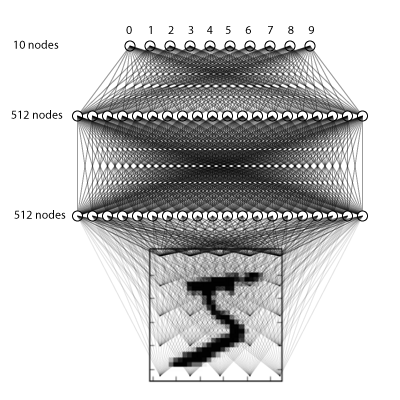

In [55]:
from keras.models import Sequential  #model
from keras.layers import Dense, Dropout, Activation  #layers
#from keras.utils import np_utils #numpy related tools

In [58]:
model=Sequential([
    Dense(512,input_shape=(784,),activation='relu'),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=20,
          verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 225us/sample - loss: 2.4734 - accuracy: 0.9061
Epoch 2/20
60000/60000 [==============================] - 12s 208us/sample - loss: 0.3491 - accuracy: 0.9533
Epoch 3/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2037 - accuracy: 0.9665
Epoch 4/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1554 - accuracy: 0.9723
Epoch 5/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1352 - accuracy: 0.9749
Epoch 6/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1168 - accuracy: 0.9767
Epoch 7/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1101 - accuracy: 0.9772
Epoch 8/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0791 - accuracy: 0.9817
Epoch 9/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0817 - accuracy: 0.9819
Epo

In [68]:
score=model.evaluate(X_test,Y_test)
print('test score: ',score[0])
print('test accuracy: ',score[1])

test score:  0.20535101112624535
test accuracy:  0.9707


In [77]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predictions=model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

In [122]:
print(predicted_classes[0],np.argmax(Y_test[0]))

7 7


In [140]:
Y_test=np.argmax(Y_test, axis=1)

In [142]:
print(predictions.shape)
print(Y_test.shape)

(10000, 10)
(10000,)


In [144]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

In [155]:
correct=correct_indices.sum()
incorrect=incorrect_indices.sum()
total=correct+incorrect
print('correct count   = %s/%s'%(correct,total))
print('incorrect count = %s/%s'%(incorrect,total))

correct count   = 48818461/49995000
incorrect count = 1176539/49995000


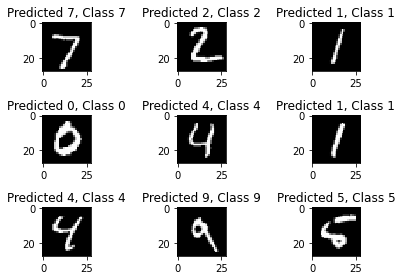

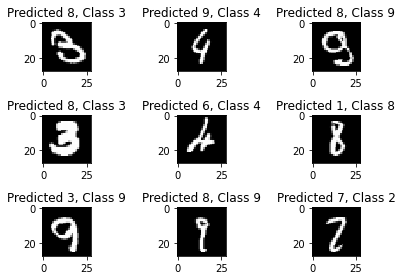

In [150]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    
plt.tight_layout()